### Configuration 

In [73]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import random

sns.set(style="whitegrid", font_scale=2, rc={'figure.figsize':(7,6.5)}) #Change Figure/Font Size 
plt.rcParams["font.family"] = 'Times New Roman'

# Coloring for blindess
# https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40-%23c56963-%2329315f-%238ab335
coloring = ['#D81B60', "#1E88E5", "#FFC107", "#004D40", "#C56963", "#29315F", "#8AB335",
            '#FE8250', '#702865', '#EF1C70', '#7BF17C', '#BD80BD', '#5BCDAC']

In [74]:
df = pd.read_csv('2020-nips-v1.csv')
df = df.set_index('exp')
df.head(5) #Preview

,date,time,task,net,tacc,tloss,vloss,vacc1,vacc2,vacc3,vacc4,tppl,vppl,sps,tbpc,vbpc
exp,,,,,,,,,,,,,,,,
1,2020-05-23,04:25:16,fib,nam,0.998281,0.000254,0.036135,0.96875,0.895833,0.708333,0.515625,1.001078,1.095501,121.550001,NaN,NaN
2,2020-05-23,07:26:23,fib,xlnet,0.297578,0.156668,1.689033,0.00000,0.000000,0.000000,0.000000,1.046246,1092.365684,95.966771,NaN,NaN
3,2020-05-23,11:17:20,fib,gru,0.191133,0.192773,0.434366,0.00000,0.000000,0.000000,0.000000,2.279826,2.997453,263.245679,NaN,NaN
4,2020-05-23,12:40:16,fib,lstm,0.169961,0.216383,0.447732,0.00000,0.000000,0.000000,0.000000,2.520672,3.098974,566.426348,NaN,NaN
5,2020-05-23,13:19:19,fib,tf,0.780820,0.034982,1.763515,0.00000,0.000000,0.000000,0.000000,1.031015,124.429347,158.702251,NaN,NaN


In [75]:
def plotTask1Models(title, digit, legend=False):
    plt.plot(x, y_nam, color=coloring[0], label='I-BERT', marker='o', linewidth=3, linestyle='solid')
    plt.plot(x, y_xlnet, color=coloring[1], label='XLNet', marker='v', linewidth=3,linestyle='solid')
#     plt.plot(x, y_gru, color=coloring[2], label='GRU', marker='d', linestyle='solid')
    plt.plot(x, y_lstm, color=coloring[3], label='LSTM seq2seq', marker ='s', linewidth=3,linestyle='solid')
    plt.plot(x, y_tf, color=coloring[4], label='BERT', marker ='x', linewidth=3, linestyle='solid')
    
    if legend == True: plt.legend()
#     plt.title(title, fontsize=fontSize)
    plt.xlabel('Validation Digits')
#     plt.ylabel('Validation Accuracy')
    plt.xticks(np.arange(digit+1, digit+5, 1))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    plt.show()

In [76]:
def plotTask2Models(title, digit, legend=False):
    plt.plot(x, y_nam, color=coloring[0], label='I-BERT', marker='o', linewidth=2.5, linestyle='solid')
    plt.plot(x, y_nampos, color=coloring[5], label='I-BERT w/ pos', marker='P', linewidth=2.5, linestyle='solid')
    plt.plot(x, y_vikram, color=coloring[6], label='I-BERT2', marker=7, linewidth=2.5, linestyle='solid')
    
    if legend == True: plt.legend()
#     plt.title(title, fontsize=fontSize)
    plt.xlabel('Validation Digits')
#     plt.ylabel('Validation Accuracy')
    plt.xticks(np.arange(digit+1, digit+5, 1))
    plt.yticks(np.arange(0, 1.1, step=0.2))
    plt.show()

### Task1: Fib
1~5

In [77]:
# X Range
x = [13, 14, 15, 16]

# nam
y_nam = [df['vacc1'][1], df['vacc2'][1], df['vacc3'][1], df['vacc4'][1]]
# xlnet
y_xlnet = [df['vacc1'][2], df['vacc2'][2], df['vacc3'][2], df['vacc4'][2]]
# gru
y_gru = [df['vacc1'][3], df['vacc2'][3], df['vacc3'][3], df['vacc4'][3]]
# lstm
y_lstm = [df['vacc1'][4], df['vacc2'][4], df['vacc3'][4], df['vacc4'][4]]
# tf
y_tf = [df['vacc1'][5], df['vacc2'][5], df['vacc3'][5], df['vacc4'][5]]

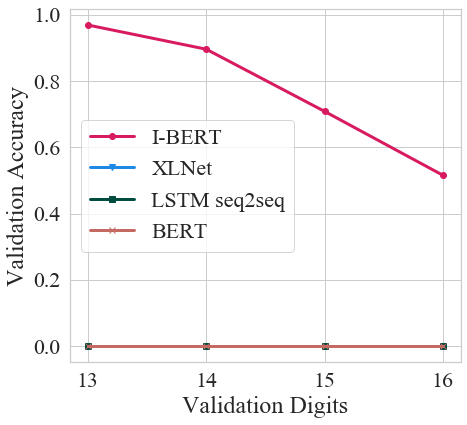

In [78]:
fig1, ax1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask1Models('Fibonacci test', digit=12, legend=True)
fig1.savefig("img/task1-fib.pdf", format="pdf", bbox_inches='tight')

### Task1: Arith
6~10

In [79]:
# X Range
x = [13, 14, 15, 16]

# nam
y_nam = [df['vacc1'][6], df['vacc2'][6], df['vacc3'][6], df['vacc4'][6]]
# xlnet
y_xlnet = [df['vacc1'][7], df['vacc2'][7], df['vacc3'][7], df['vacc4'][7]]
# gru
y_gru = [df['vacc1'][8], df['vacc2'][8], df['vacc3'][8], df['vacc4'][8]]
# lstm
y_lstm = [df['vacc1'][9], df['vacc2'][9], df['vacc3'][9], df['vacc4'][9]]
# tf
y_tf = [df['vacc1'][10], df['vacc2'][10], df['vacc3'][10], df['vacc4'][10]]

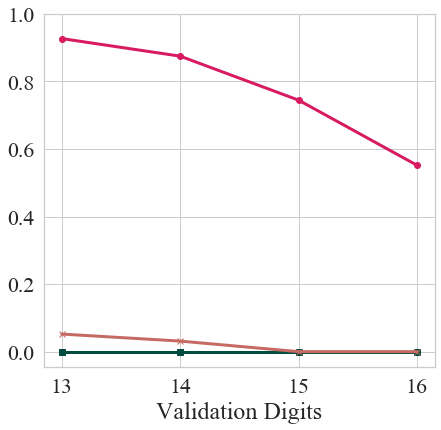

In [80]:
fig2, ax2 = plt.subplots()
plt.ylabel('')
plotTask1Models('Arithmetic test', digit=12)
fig2.savefig("img/task1-arith.pdf", format="pdf", bbox_inches='tight')

### Task1: Copy
11~15

In [81]:
# X Range
x = [13, 14, 15, 16]

# nam
y_nam = [df['vacc1'][11], df['vacc2'][11], df['vacc3'][11], df['vacc4'][11]]
# xlnet
y_xlnet = [df['vacc1'][12], df['vacc2'][12], df['vacc3'][12], df['vacc4'][12]]
# gru
y_gru = [df['vacc1'][13], df['vacc2'][13], df['vacc3'][13], df['vacc4'][13]]
# lstm
y_lstm = [df['vacc1'][14], df['vacc2'][14], df['vacc3'][14], df['vacc4'][14]]
# tf
y_tf = [df['vacc1'][15], df['vacc2'][15], df['vacc3'][15], df['vacc4'][15]]

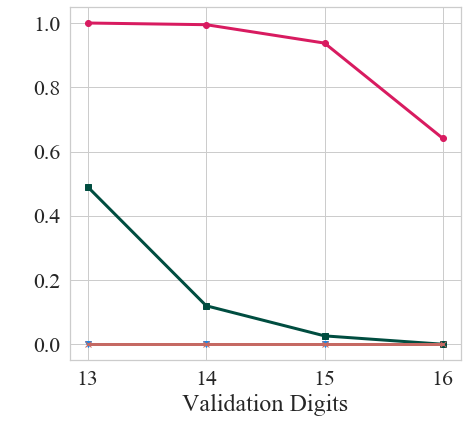

In [82]:
fig3, ax3 = plt.subplots()
plt.ylabel('   ')
plotTask1Models('Copy test', digit=12)
fig3.savefig("img/task1-copy.pdf", format="pdf", bbox_inches='tight')

### Task1: Palindrome
16~20

In [83]:
# X Range
x = [13, 14, 15, 16]

# nam
y_nam = [df['vacc1'][16], df['vacc2'][16], df['vacc3'][16], df['vacc4'][16]]
# xlnet
y_xlnet = [df['vacc1'][17], df['vacc2'][17], df['vacc3'][17], df['vacc4'][17]]
# gru
y_gru = [df['vacc1'][18], df['vacc2'][18], df['vacc3'][18], df['vacc4'][18]]
# lstm
y_lstm = [df['vacc1'][19], df['vacc2'][19], df['vacc3'][19], df['vacc4'][19]]
# tf
y_tf = [df['vacc1'][20], df['vacc2'][20], df['vacc3'][20], df['vacc4'][20]]

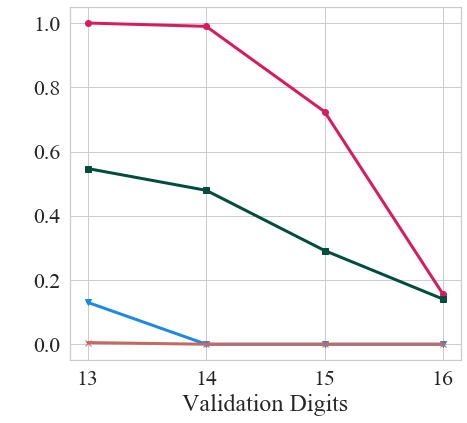

In [84]:
fig4, ax4 = plt.subplots()
plt.ylabel('   ')
plotTask1Models('Palindrome test', digit=12)
fig4.savefig("img/task1-palindrome.pdf", format="pdf", bbox_inches='tight')

### Task2: 5digits
21-23

In [85]:
x = [6, 7, 8, 9]

# nam
y_nam = [df['vacc1'][21], df['vacc2'][21], df['vacc3'][21], df['vacc4'][21]]
# nampos
y_nampos = [df['vacc1'][22], df['vacc2'][22], df['vacc3'][22], df['vacc4'][22]]
# vikram
y_vikram = [df['vacc1'][23], df['vacc2'][23], df['vacc3'][23], df['vacc4'][23]]

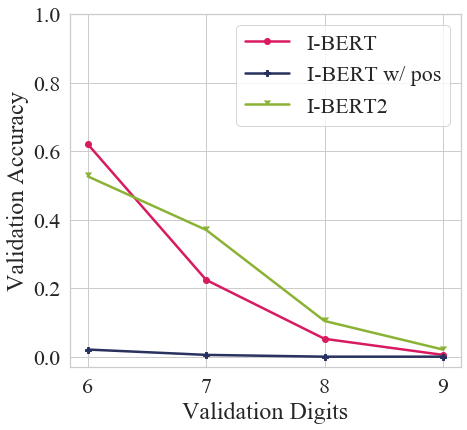

In [86]:
fig2_1, ax2_1 = plt.subplots()
plt.ylabel('Validation Accuracy')
plotTask2Models('Fibonacci test (5 digit)', digit=5, legend=True)
fig2_1.savefig("img/task2-5digit.pdf", format="pdf", bbox_inches='tight')

### Task2: 8digits
24-26

In [87]:
x = [9, 10, 11, 12]

# nam
y_nam = [df['vacc1'][24], df['vacc2'][24], df['vacc3'][24], df['vacc4'][24]]
# nampos
y_nampos = [df['vacc1'][25], df['vacc2'][25], df['vacc3'][25], df['vacc4'][25]]
# vikram
y_vikram = [df['vacc1'][26], df['vacc2'][26], df['vacc3'][26], df['vacc4'][26]]

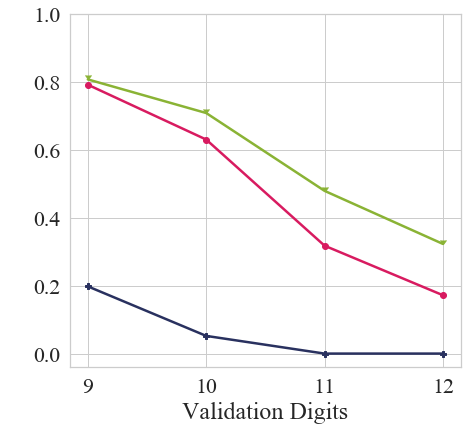

In [88]:
fig2_2, ax2_2 = plt.subplots()
plt.ylabel('    ')
plotTask2Models('Fibonacci test (8 digit)', digit=8)
fig2_2.savefig("img/task2-8digit.pdf", format="pdf", bbox_inches='tight')

### Task3: 12digits
1, 37, 38

In [89]:
x = [13, 14, 15, 16]

# nam
y_nam = [df['vacc1'][1], df['vacc2'][1], df['vacc3'][1], df['vacc4'][1]]
# nampos
y_nampos = [df['vacc1'][37], df['vacc2'][37], df['vacc3'][37], df['vacc4'][37]]
# vikram
y_vikram = [df['vacc1'][38], df['vacc2'][38], df['vacc3'][38], df['vacc4'][38]]

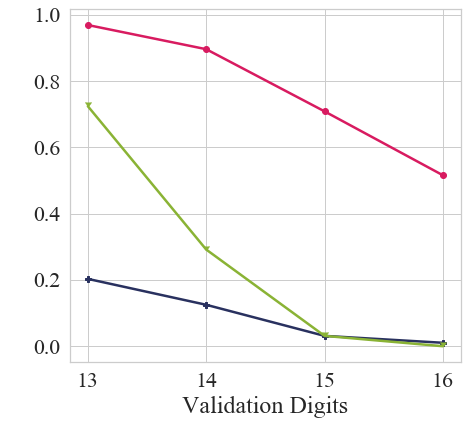

In [90]:
fig2_3, ax2_3 = plt.subplots()
plt.ylabel('       ')
plotTask2Models('Fibonacci test (12 digit)', digit=12)
fig2_3.savefig("img/task2-12digit.pdf", format="pdf", bbox_inches='tight')